In [ ]:
import zipfile
import os
zip_path = "/content/drive/MyDrive/Fingerprints.zip"
extract_path = "/content/Fingerprints"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {os.path.abspath(extract_path)}")


Dataset extracted to: /content/Fingerprints


In [ ]:
from collections import defaultdict
from PIL import Image
import os


In [ ]:

# Dataset path
dataset_root = "/content/Fingerprints/dataset"


In [ ]:

# Prepare containers
class_counts = defaultdict(int)
image_shapes = defaultdict(int)


In [ ]:
import os
import matplotlib.pyplot as plt
dataset_dir = "/content/Fingerprints/dataset"
class_counts_dict = {}
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
for class_name in sorted(os.listdir(dataset_dir)):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        count = len([
            f for f in os.listdir(class_path)
            if f.lower().endswith(image_extensions)
        ])
        class_counts_dict[class_name] = count
total_images = sum(class_counts_dict.values())
print("Total Images in Dataset:", total_images)
print("Image Count per Class:")
for cls, count in class_counts_dict.items():
    print(f"   {cls}: {count}")


Total Images in Dataset: 8000
Image Count per Class:
   A+: 1000
   A-: 1000
   AB+: 1000
   AB-: 1000
   B+: 1000
   B-: 1000
   O+: 1000
   O-: 1000


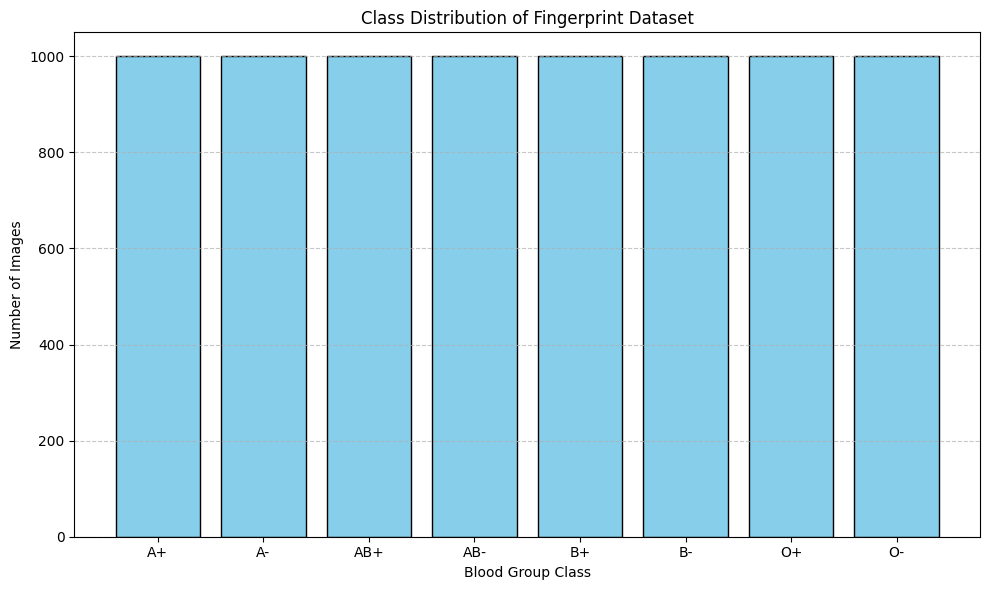

In [ ]:

# Plotting
labels = list(class_counts_dict.keys())
counts = list(class_counts_dict.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue', edgecolor='black')
plt.xlabel('Blood Group Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Fingerprint Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import os
from PIL import Image
from collections import Counter
dataset_path = "/content/Fingerprints/dataset"
image_shapes = Counter()
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if not os.path.isdir(class_dir):
        continue

    for filename in os.listdir(class_dir):
        if filename.lower().endswith(image_extensions):
            img_path = os.path.join(class_dir, filename)
            try:
                with Image.open(img_path) as img:
                    image_shapes[img.size] += 1
            except Exception as e:
                print(f"❌ Could not read {img_path}: {e}")
print("\n🖼️ Image Sizes:\n")
if image_shapes:
    for size, count in image_shapes.items():
        print(f"Size {size[0]}x{size[1]}: {count} images")
else:
    print("No images found or failed to read any image.")



🖼️ Image Sizes:

Size 96x103: 7939 images
Size 241x298: 59 images
Size 103x96: 2 images


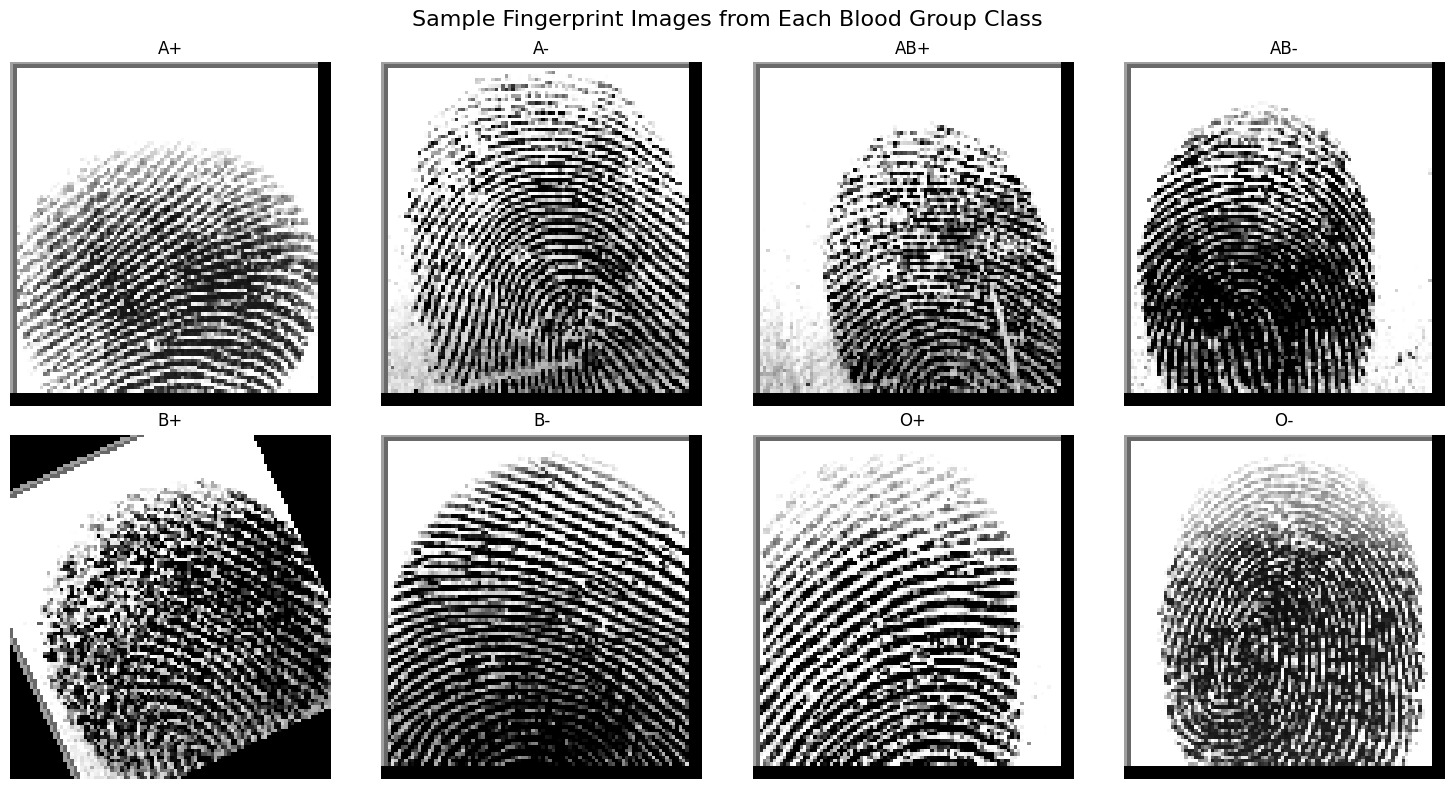

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
dataset_root = "/content/Fingerprints/dataset"
sample_images = []
labels = []

for label_folder in sorted(os.listdir(dataset_root)):
    class_path = os.path.join(dataset_root, label_folder)
    if os.path.isdir(class_path):
        for file in os.listdir(class_path):
            if file.lower().endswith(('.bmp', '.jpg', '.png', '.jpeg')):
                sample_images.append(os.path.join(class_path, file))
                labels.append(label_folder)
                break
plt.figure(figsize=(15, 8))
for i, img_path in enumerate(sample_images):
    img = Image.open(img_path).convert("L")
    plt.subplot(2, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(labels[i])
    plt.axis('off')

plt.suptitle("Sample Fingerprint Images from Each Blood Group Class", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
original_dataset_dir = "/content/Fingerprints/dataset"
split_dataset_dir = "content/Fingerprints/split_dataset"
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
image_paths = []
labels = []

for class_name in os.listdir(original_dataset_dir):
    class_dir = os.path.join(original_dataset_dir, class_name)
    if os.path.isdir(class_dir):
        for file_name in os.listdir(class_dir):
            if file_name.lower().endswith(image_extensions):
                image_paths.append(os.path.join(class_dir, file_name))
                labels.append(class_name)

# Split dataset: 70% train, 15% val, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(
    image_paths, labels, test_size=0.15, stratify=labels, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42
)

def copy_files(image_list, labels_list, split_name):
    for img_path, label in zip(image_list, labels_list):
        dst_dir = os.path.join(split_dataset_dir, split_name, label)
        os.makedirs(dst_dir, exist_ok=True)
        shutil.copy(img_path, os.path.join(dst_dir, os.path.basename(img_path)))
copy_files(X_train, y_train, 'train')
copy_files(X_val, y_val, 'val')
copy_files(X_test, y_test, 'test')

print("✅ Dataset successfully split into train/val/test with class balance.")


✅ Dataset successfully split into train/val/test with class balance.


In [ ]:
import shutil
split_dataset_dir = "/content/content/Fingerprints/split_dataset"
output_zip_path = "content/Fingerprints_split_dataset.zip"
shutil.make_archive(base_name=output_zip_path.replace(".zip", ""),
                    format='zip',
                    root_dir=split_dataset_dir)

print(f"✅ Zipped dataset created at: {output_zip_path}")


✅ Zipped dataset created at: content/Fingerprints_split_dataset.zip


In [ ]:
import zipfile
import os
zip_path = "/content/content/Fingerprints_split_dataset.zip"
extract_path = "/content/Fingerprints_split_dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {os.path.abspath(extract_path)}")


Dataset extracted to: /content/Fingerprints_split_dataset


In [ ]:
import os
base_dir = "/content/Fingerprints_split_dataset"
splits = ['train', 'val', 'test']
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp')
for split in splits:
    split_dir = os.path.join(base_dir, split)
    total_images = 0
    print(f"\n📁 {split.upper()} Set:")

    for class_name in os.listdir(split_dir):
        class_dir = os.path.join(split_dir, class_name)
        if os.path.isdir(class_dir):
            num_images = len([
                f for f in os.listdir(class_dir)
                if f.lower().endswith(image_extensions)
            ])
            total_images += num_images
            print(f"  🔸 Class {class_name}: {num_images} images")

    print(f"✅ Total images in {split} set: {total_images}")



📁 TRAIN Set:
  🔸 Class AB+: 700 images
  🔸 Class AB-: 700 images
  🔸 Class O-: 700 images
  🔸 Class A-: 700 images
  🔸 Class B+: 700 images
  🔸 Class O+: 699 images
  🔸 Class A+: 700 images
  🔸 Class B-: 700 images
✅ Total images in train set: 5599

📁 VAL Set:
  🔸 Class AB+: 150 images
  🔸 Class AB-: 150 images
  🔸 Class O-: 150 images
  🔸 Class A-: 150 images
  🔸 Class B+: 150 images
  🔸 Class O+: 151 images
  🔸 Class A+: 150 images
  🔸 Class B-: 150 images
✅ Total images in val set: 1201

📁 TEST Set:
  🔸 Class AB+: 150 images
  🔸 Class AB-: 150 images
  🔸 Class O-: 150 images
  🔸 Class A-: 150 images
  🔸 Class B+: 150 images
  🔸 Class O+: 150 images
  🔸 Class A+: 150 images
  🔸 Class B-: 150 images
✅ Total images in test set: 1200


In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import timm
import os
import time
import matplotlib.pyplot as plt
from torch.cuda.amp import GradScaler, autocast
from torch.optim.lr_scheduler import CosineAnnealingLR

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Configuration
NUM_EPOCHS = 50  # Increased for better convergence
IMAGE_SIZE = 224
BATCH_SIZE = 32
MODEL_NAME = "vit_base_patch16_224"  # Stronger model
USE_MIXED_PRECISION = True

# Transforms
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(IMAGE_SIZE, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),  # Repeat grayscale to 3 channels
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

eval_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Dataset Paths
data_dir = "/content/Fingerprints_split_dataset"

train_data = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=train_transform)
val_data   = datasets.ImageFolder(os.path.join(data_dir, "val"), transform=eval_transform)
test_data  = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=eval_transform)

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

num_classes = len(train_data.classes)
print(f"Number of classes: {num_classes}")

# Load Model
model = timm.create_model(MODEL_NAME, pretrained=True)
print(f"Loaded model: {MODEL_NAME}")

# Replace classifier head with dropout
model.head = nn.Sequential(
    nn.Dropout(p=0.3),
    nn.Linear(model.head.in_features, num_classes)
)
model.to(device)

# Loss, Optimizer, Scheduler
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
scheduler = CosineAnnealingLR(optimizer, T_max=NUM_EPOCHS)

if USE_MIXED_PRECISION and device.type == 'cuda':
    scaler = GradScaler()
    print("Using mixed precision training.")
elif USE_MIXED_PRECISION and device.type != 'cuda':
    print("Mixed precision requested but CUDA not available. Training will proceed in full precision.")

# Training Loop
train_acc_list, val_acc_list = [], []
start_time = time.time()

for epoch in range(NUM_EPOCHS):
    model.train()
    train_loss, correct, total = 0.0, 0, 0
    epoch_start_time = time.time()

    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()

        with autocast(enabled=USE_MIXED_PRECISION and device.type == 'cuda'):
            outputs = model(images)
            loss = criterion(outputs, labels)

        if USE_MIXED_PRECISION and device.type == 'cuda':
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            loss.backward()
            optimizer.step()

        train_loss += loss.item() * labels.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total
    train_acc_list.append(train_acc)

    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        with autocast(enabled=USE_MIXED_PRECISION and device.type == 'cuda'):
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * labels.size(0)
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_acc_list.append(val_acc)
    scheduler.step()

    epoch_end_time = time.time()
    epoch_duration = epoch_end_time - epoch_start_time
    print(f"Epoch {epoch+1}/{NUM_EPOCHS} => Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f} (Time: {epoch_duration:.2f}s)")


Using device: cuda
Number of classes: 8
Loaded model: vit_base_patch16_224
Using mixed precision training.


<ipython-input-15-3391070822>:74: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
<ipython-input-15-3391070822>:92: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=USE_MIXED_PRECISION and device.type == 'cuda'):
<ipython-input-15-3391070822>:115: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=USE_MIXED_PRECISION and device.type == 'cuda'):


Epoch 1/50 => Train Acc: 0.3615, Val Acc: 0.4696 (Time: 50.36s)
Epoch 2/50 => Train Acc: 0.6306, Val Acc: 0.7552 (Time: 49.28s)
Epoch 3/50 => Train Acc: 0.7705, Val Acc: 0.8435 (Time: 49.80s)
Epoch 4/50 => Train Acc: 0.8126, Val Acc: 0.8510 (Time: 49.85s)
Epoch 5/50 => Train Acc: 0.8221, Val Acc: 0.8426 (Time: 49.47s)
Epoch 6/50 => Train Acc: 0.8351, Val Acc: 0.8285 (Time: 49.72s)
Epoch 7/50 => Train Acc: 0.8468, Val Acc: 0.8676 (Time: 49.79s)
Epoch 8/50 => Train Acc: 0.8591, Val Acc: 0.8609 (Time: 49.40s)
Epoch 9/50 => Train Acc: 0.8666, Val Acc: 0.8734 (Time: 49.59s)
Epoch 10/50 => Train Acc: 0.8716, Val Acc: 0.9009 (Time: 49.72s)
Epoch 11/50 => Train Acc: 0.8773, Val Acc: 0.8368 (Time: 49.33s)
Epoch 12/50 => Train Acc: 0.8912, Val Acc: 0.8859 (Time: 49.40s)
Epoch 13/50 => Train Acc: 0.8857, Val Acc: 0.8726 (Time: 49.63s)
Epoch 14/50 => Train Acc: 0.8950, Val Acc: 0.8926 (Time: 49.50s)
Epoch 15/50 => Train Acc: 0.9003, Val Acc: 0.8601 (Time: 49.41s)
Epoch 16/50 => Train Acc: 0.8959, 

In [ ]:

# Test Evaluation
model.eval()
test_correct = 0
test_total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        test_total += labels.size(0)
        test_correct += (preds == labels).sum().item()
print(f"Test Accuracy: {100 * test_correct / test_total:.2f}%")


Test Accuracy: 92.25%


<Figure size 800x600 with 0 Axes>

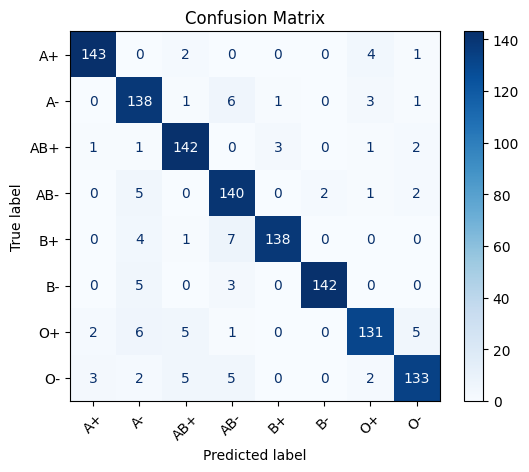

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
# Put model in evaluation mode
model.eval()
# Lists to collect true and predicted labels
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
class_names = test_data.classes  # Get class names from dataset
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the transform used during training and evaluation for 3 channels
# It converts to grayscale and then repeats the channel 3 times.
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Ensure grayscale
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)), # Repeat grayscale channel 3 times
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) # Normalize for 3 channels
])

# Load test dataset from path
test_dir = "/content/Fingerprints_split_dataset/test"
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Get class names
class_names = test_dataset.classes
print("Classes:", class_names)

Classes: ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']


In [ ]:
model.eval()

for idx, (image, label) in enumerate(test_loader):
    image = image.to(device)
    label = label.to(device)

    with torch.no_grad():
        output = model(image)
        _, pred = torch.max(output, 1)

    actual_label = class_names[label.item()]
    predicted_label = class_names[pred.item()]

    print(f"[{idx+1}] Actual: {actual_label}, Predicted: {predicted_label}")


[1] Actual: A+, Predicted: A+
[2] Actual: A+, Predicted: A+
[3] Actual: A+, Predicted: A+
[4] Actual: A+, Predicted: A+
[5] Actual: A+, Predicted: A+
[6] Actual: A+, Predicted: A+
[7] Actual: A+, Predicted: A+
[8] Actual: A+, Predicted: A+
[9] Actual: A+, Predicted: A+
[10] Actual: A+, Predicted: A+
[11] Actual: A+, Predicted: A+
[12] Actual: A+, Predicted: O+
[13] Actual: A+, Predicted: A+
[14] Actual: A+, Predicted: A+
[15] Actual: A+, Predicted: A+
[16] Actual: A+, Predicted: A+
[17] Actual: A+, Predicted: A+
[18] Actual: A+, Predicted: A+
[19] Actual: A+, Predicted: A+
[20] Actual: A+, Predicted: A+
[21] Actual: A+, Predicted: A+
[22] Actual: A+, Predicted: A+
[23] Actual: A+, Predicted: A+
[24] Actual: A+, Predicted: A+
[25] Actual: A+, Predicted: A+
[26] Actual: A+, Predicted: A+
[27] Actual: A+, Predicted: A+
[28] Actual: A+, Predicted: A+
[29] Actual: A+, Predicted: O+
[30] Actual: A+, Predicted: A+
[31] Actual: A+, Predicted: A+
[32] Actual: A+, Predicted: A+
[33] Actual: A+, 

In [ ]:
correct_count = 0
wrong_count = 0

model.eval()
with torch.no_grad():
    for idx, (image, label) in enumerate(test_loader):
        image = image.to(device)
        label = label.to(device)

        output = model(image)
        _, pred = torch.max(output, 1)

        if pred == label:
            correct_count += 1
        else:
            wrong_count += 1

total_images = correct_count + wrong_count
print(f"Total Test Images: {total_images}")
print(f"Correct Predictions: {correct_count}")
print(f"Wrong Predictions: {wrong_count}")
print(f"Accuracy: {(correct_count / total_images) * 100:.2f}%")


Total Test Images: 1200
Correct Predictions: 1107
Wrong Predictions: 93
Accuracy: 92.25%


In [ ]:
# Save model weights
torch.save(model.state_dict(), "vit_bloodgroup_model.pt")
print("Model weights saved to vit_bloodgroup_model.pt")


Model weights saved to vit_bloodgroup_model.pt


In [ ]:
# Save the entire model (structure + weights)
torch.save(model, "vit_bloodgroup_fullmodel.pt")
print("Full model saved to vit_bloodgroup_fullmodel.pt")


Full model saved to vit_bloodgroup_fullmodel.pt
